In [2]:
import numpy as np
import matplotlib.pyplot as plt

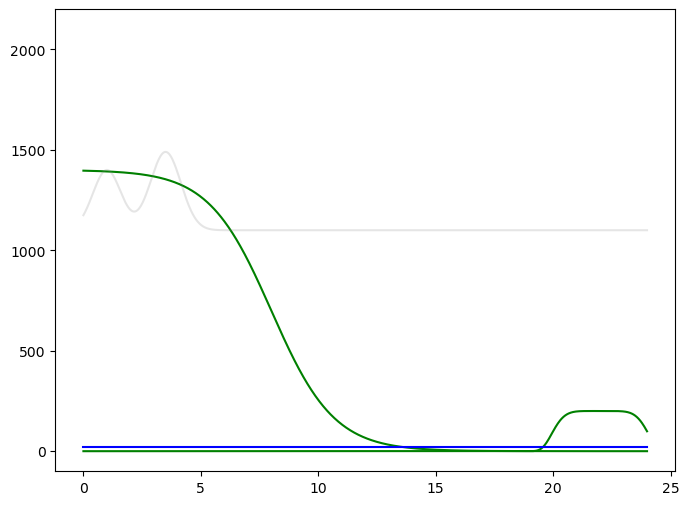

In [3]:
fig, ax = plt.subplots(figsize=(8,6))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

xlim = 24
x = np.linspace(0, xlim, 1000)

water_height = 20
mountain_height = 1100
mountain_width = 5
mountain_slope = 200

def water(x):
    return water_height

def linear_mountain(x):
    top_height = mountain_height
    top_width = mountain_width
    down_slope = mountain_slope
    if x < top_width:
        return top_height
    else:
        return top_height - down_slope * (x - top_width)
    
def algebraic_mountain(x):
    algebraic_sigmoid = lambda x,a : x / np.power(1 + np.power(np.abs(x),a), 1/a)
    horiz_offset = 3
    scale = 1400
    a = 2
    return algebraic_sigmoid(x-horiz_offset,a)*scale/2 + scale/2

def mountain(x):
    sigmoid = lambda x,k : 1 / (1 + np.exp(-k*x))
    horiz_offset = 8
    scale = 1400
    k = 0.75
    return sigmoid(horiz_offset-x,k)*scale

def snow(x):
    return 300*gaussian(x,1,0.6) + 390*gaussian(x,3.5,0.65)

def linear_snow(x):
    x = x + 0.5
    bot_height = mountain_height
    bot_width = mountain_width
    slope = mountain_slope + 100
    if (x < bot_width/6):
        return x*slope
    elif (x >= bot_width/6) and (x <= bot_width/2):
        return (x-bot_width/6)*slope
    elif (x > bot_width/2) and (x <= 5*bot_width/6):
        return - (x-5*bot_width/6)*slope
    elif (x > (5*bot_width/6)) and (x < bot_width):
        return - (x-bot_width)*slope

# def flat_ubc(x):
#     if x < 10.5:
#         return 0
#     else:
#         return 200
    
def ubc(x):
    return 200 * np.exp(-np.power(np.power(x-22,2)/(2*np.power(1.5,2)),3))

xw = np.vectorize(water)(x)
xm = np.vectorize(mountain)(x)
xs = np.vectorize(snow)(x) + mountain_height
xu = np.vectorize(ubc)(x)

ax.plot(x, xm, color='green')
ax.plot(x, xs, color='gray', alpha=0.2)
ax.plot(x, xu, color='green')
ax.plot(x, xw, color='blue')

ax.set_ylim(-100, 2200)

plt.show()

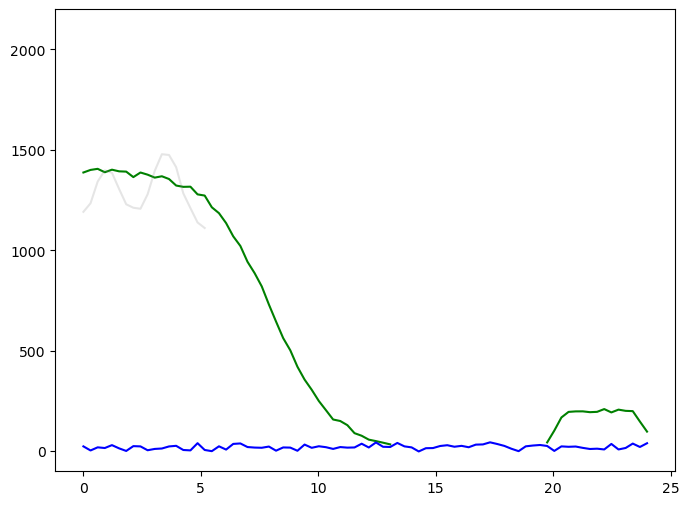

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

nbins = 80
bins = np.linspace(0, xlim, nbins)

data = {}
data['water'] = np.vectorize(water)(bins)
data['mountains'] = np.vectorize(mountain)(bins)
data['snow'] = np.vectorize(snow)(bins)
data['ubc'] = np.vectorize(ubc)(bins)

newbins = {}

for key in data:
    if key == 'mountains' or key == 'ubc':
        lower_limit = 30
    elif key == 'snow':
        lower_limit = 10
    else:
        lower_limit = 0
    newbins[key] = bins[data[key] > lower_limit]
    data[key] = data[key][data[key] > lower_limit]
    data[key] = data[key] + np.random.normal(scale=10, size=data[key].size)
    
ax.plot(newbins['mountains'], data['mountains'], color='green')
ax.plot(newbins['snow'], data['snow'] + mountain_height, color='gray', alpha=0.2)
ax.plot(newbins['ubc'], data['ubc'], color='green')
ax.plot(newbins['water'], data['water'], color='blue')

ax.set_ylim(-100, 2200)

plt.show()

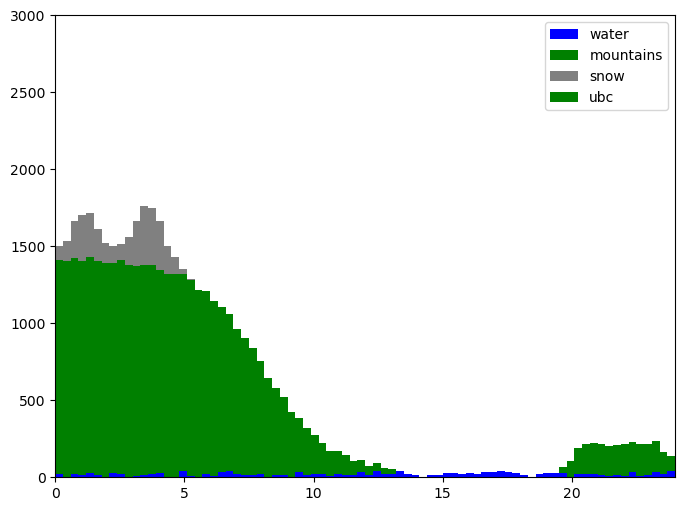

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
hist_entries = []
for key in ['water', 'mountains','snow','ubc']:
    entries = []
    for binid,total in zip(newbins[key],data[key]):
        if total > 0:
            for i in range(int(total)):
                entries.append(binid)
    hist_entries.append(entries)

ax.hist(hist_entries, bins=nbins, stacked=True, label=['water', 'mountains', 'snow', 'ubc'], color=['blue', 'green', 'gray', 'green'])
ax.legend()
ax.set_ylim(0, 3000)
ax.set_xlim(0, xlim)
plt.show()

In [16]:
import ROOT
import atlasplots as aplt

ocean_blue = ROOT.kAzure-5
snow_white = 18
ubc_green = ROOT.kGreen-5
forest_green = ROOT.kTeal+4

aplt.set_atlas_style()
fig, ax = aplt.subplots(1, 1, name='fig1', figsize=(800,800))

water_hist = ROOT.TH1F('water_hist', 'Water', nbins, 0, xlim)
for binid,total in zip(newbins['water'],data['water']):
    if total > 0:
        for i in range(int(total)):
            water_hist.Fill(binid, 1/1000)
water_hist.SetFillColor(ocean_blue)
water_hist.SetLineWidth(0)
water_hist.GetYaxis().SetRange(-1,1)
                
mountain_hist = ROOT.TH1F('mountain_hist', 'Mountains', nbins, 0, xlim)
for binid,total in zip(newbins['mountains'],data['mountains']):
    if total > 0:
        for i in range(int(total)):
            mountain_hist.Fill(binid, 1/1000)
mountain_hist.SetFillColor(forest_green)
mountain_hist.SetFillStyle(300)
mountain_hist.SetLineWidth(0)

ubc_hist = ROOT.TH1F('ubc_hist', 'UBC', nbins, 0, xlim)
for binid,total in zip(newbins['ubc'],data['ubc']):
    if total > 0:
        for i in range(int(total)):
            ubc_hist.Fill(binid, 1/1000)
ubc_hist.SetFillColor(ubc_green)
ubc_hist.SetLineWidth(0)

snow_hist = ROOT.TH1F('snow_hist', 'Snow', nbins, 0, xlim)
for binid,total in zip(newbins['snow'],data['snow']):
    if total > 0:
        for i in range(int(total)):
            snow_hist.Fill(binid, 1/1000)
snow_hist.SetFillColor(snow_white)
snow_hist.SetLineWidth(0)

data_hist = ROOT.TH1F('data_hist', 'ATLAS Members', nbins, 0, xlim)
for key in data:
    for binid,total in zip(newbins[key],data[key]):
        if binid >= 16.3 and binid <= 16.6:
            data_hist.Fill(binid, -0.07)
        elif total > 0:
            jitter = total/50 + 8
            for i in range(int(total + np.random.normal(scale=jitter))):
                data_hist.Fill(binid, 1/1000)
                
data_hist.Sumw2()
data_hist.SetBinErrorOption(ROOT.TH1.EBinErrorOpt.kPoisson)
            
stack = ROOT.THStack('stack', '')
stack.Add(water_hist)
stack.Add(mountain_hist)
stack.Add(snow_hist)
stack.Add(ubc_hist)
ax.plot(stack)

# err_band = aplt.root_helpers.hist_to_graph(
#     stack.GetStack().Last(),
#     show_bin_width=True
# )
# ax.plot(err_band, "2", fillcolor=1, fillstyle=3254, linewidth=0)

leftovers_hist = ROOT.TH1F('leftovers_hist', 'Leftovers', 350, -1, xlim+1)
leftovers_hist.SetFillColor(ocean_blue)
leftovers_hist.SetLineWidth(0)
ax.plot(leftovers_hist, "LF2")

data_graph = aplt.root_helpers.hist_to_graph(data_hist)
data_graph.SetMarkerSize(0.65)
ax.plot(data_graph, "P")

ax.add_margins(top=0.2)
aplt.atlas_label(text='Week', loc='upper left')
ax.text(0.2, 0.86, 'June 2023, Vancouver', size=22, align=13)

legend = ax.legend(
    loc=(0.59, 0.65, 1-ROOT.gPad.GetRightMargin()-0.03, 1-ROOT.gPad.GetTopMargin()-0.03),
    textsize=20
)

legend.AddEntry(data_hist, 'ATLAS Week Attendees', 'EP')
legend.AddEntry(snow_hist, "Ch'ich'iy#acute{u}y Elxw#acute{i}kn", 'F')
legend.AddEntry(ubc_hist, 'UBC (Point Grey)', 'F')
legend.AddEntry(mountain_hist, 'North Shore', 'F')
legend.AddEntry(water_hist, 'Salish Sea', 'F')
# legend.AddEntry(snow_hist, 'Twin Sisters', 'F')
# legend.AddEntry(snow_hist, 'The Lions', 'F')

ax.set_xlim(0,23.5)
ax.set_ylim(-0.2, 2.3)

ax.set_xlabel("Distance to The Lions [km]")
ax.set_ylabel("Elevation [km]")

fig.savefig('t-shirt.pdf')

Applying ATLAS style settings


Warning in <TCanvas::Constructor>: Deleting canvas with same name: fig1
Warning in <TROOT::Append>: Replacing existing TH1: water_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mountain_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ubc_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: snow_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data_hist (Potential memory leak).
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: leftovers_hist (Potential memory leak).
Info in <TCanvas::Print>: pdf file t-shirt.pdf has been created


In [17]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('t-shirt.pdf',size=(800,800))